<a href="https://colab.research.google.com/github/EduHdzVillasana/Proyecto_ML_BEDU/blob/main/Experimentos%20Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimentos con modelos de forecasting

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import TimeSeriesSplit

import matplotlib.pyplot as plt
import seaborn as sns

## Obtención de datos

In [2]:
file_url = "https://raw.githubusercontent.com/EduHdzVillasana/Proyecto_ML_BEDU/main/crime_time_series.csv"

In [3]:
ts_crime = pd.read_csv(file_url).drop(columns = ["Unnamed: 0"])
ts_crime.head(10)

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447
5,2002-04-30,1322
6,2002-05-01,1450
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283


In [4]:
ts_crime.tail(10)

,Date,Total_Crimes
6924,2021-04-09,489
6925,2021-04-10,483
6926,2021-04-11,443
6927,2021-04-12,484
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458
6932,2021-04-17,474
6933,2021-04-18,1


In [5]:
ts_crime['Date'] = pd.to_datetime(ts_crime.Date)

## Función para convertir la serie de tiempo en data frame

In [6]:
def transformarSerieADataset(serie, elementosPorMuestra):
    dataset = None
    salidasDataset = None
    for counter in range (len(serie)-elementosPorMuestra-1):        
        muestra = np.array([serie[counter:counter+elementosPorMuestra]])        
        salida = np.array([serie[counter+elementosPorMuestra]])
        if dataset is None:
            dataset = muestra
        else:
            dataset = np.append(dataset,muestra,axis = 0)
        if salidasDataset is None:
            salidasDataset = salida    
        else:        
            salidasDataset = np.append(salidasDataset,salida)
    return dataset, salidasDataset

## Regresión Lineal

### Instancia 1:
**Parámetros**
* Elementos por muestra : 7

In [7]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 7)

In [8]:
print(X.shape)
print(Y.shape)

(6926, 7)
(6926,)


In [9]:
Y[:10]

array([1244, 1296, 1283, 1254, 1234, 1278, 1372, 1366, 1492, 1235])

In [10]:
Y[-10:]

array([442, 489, 483, 443, 484, 481, 434, 443, 458, 474])

In [11]:
n = 7
start = n
end = ts_crime.shape[0] - 2
(start, end)

(7, 6932)

Empieza en la posicion 7 y termina en la posicion 6932

In [12]:
ts_crime[7:6933]

,Date,Total_Crimes
7,2002-05-02,1244
8,2002-05-03,1296
9,2002-05-04,1283
10,2002-05-05,1254
11,2002-05-06,1234
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [13]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [14]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4848, 7)
(2078, 7)
(4848,)
(2078,)


In [15]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [17]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][7:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6926, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

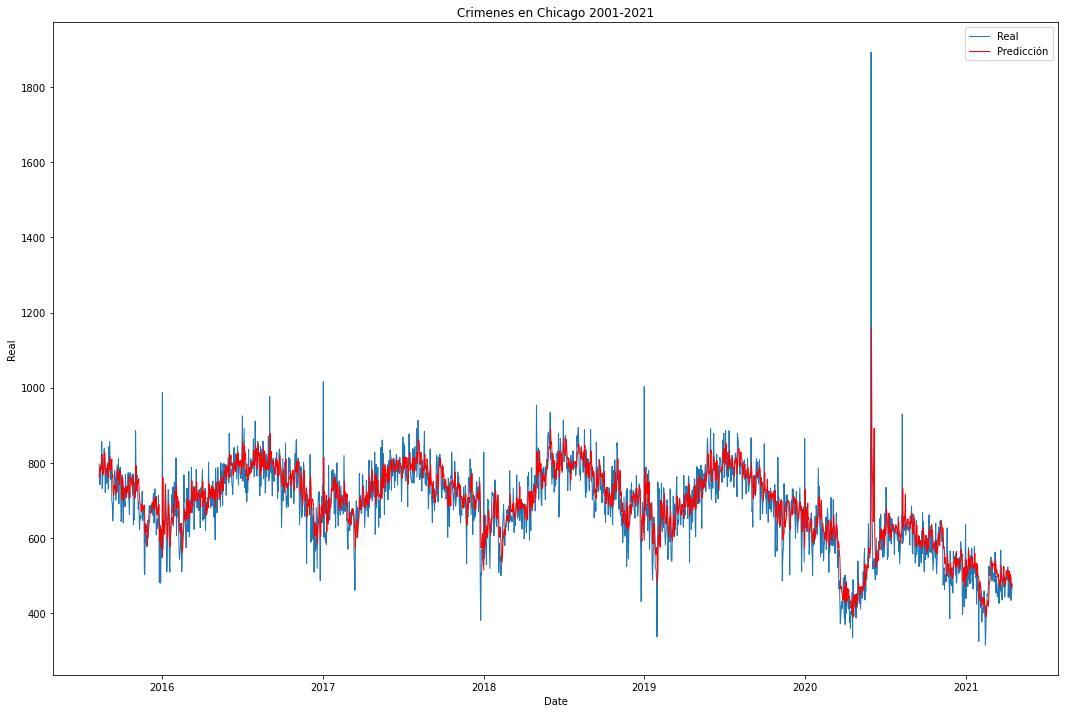

In [18]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [19]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6903.76454062773
r^2 = 0.9049712186725656


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

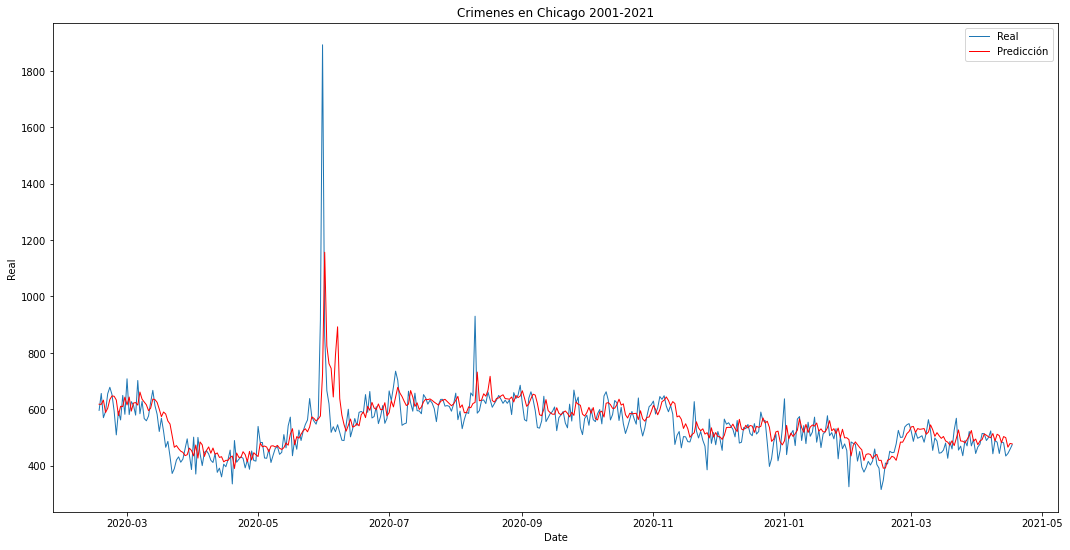

In [20]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [21]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[722, 745, 753, 793, 815, 837, 737]])

In [22]:
len(X_test)

2078

In [23]:
Y_f = []

In [24]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)
  #X_f.append(x_tmp)


In [25]:
len (Y_f)

2078

In [26]:
df_comparation = pd.DataFrame({"Date" : df_comparation["Date"][index:],
                              "Real" : df_comparation["Real"][index:],
                              "Prediccion" : Y_f})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

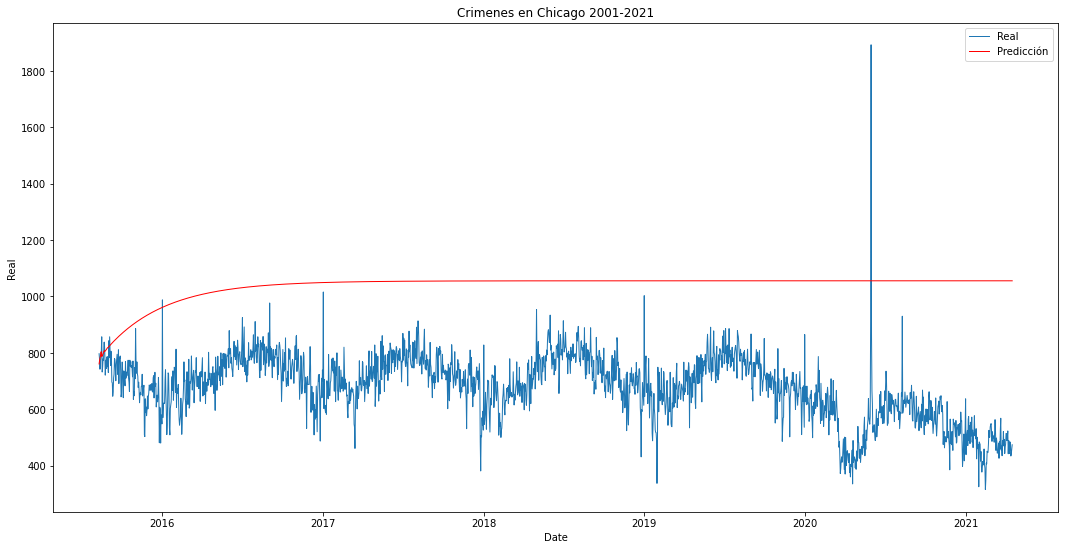

In [27]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [28]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 144693.4183690785
r^2 = -10.27376935818187


### Instancia 2:
**Parámetros**
* Elementos por muestra : 14

In [29]:
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = 14)

In [30]:
print(X.shape)
print(Y.shape)

(6919, 14)
(6919,)


In [31]:
Y[:14]

array([1366, 1492, 1235, 1153, 1383, 1429, 1507, 1244, 1396, 1352, 1232,
       1351, 1357, 1302])

In [32]:
Y[-14:]

array([513, 489, 500, 523, 442, 489, 483, 443, 484, 481, 434, 443, 458,
       474])

In [33]:
n = 14
start = n
end = ts_crime.shape[0] - 1
(start, end)

(14, 6933)

In [34]:
ts_crime[start:end]

,Date,Total_Crimes
14,2002-05-09,1366
15,2002-05-10,1492
16,2002-05-11,1235
17,2002-05-12,1153
18,2002-05-13,1383
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [35]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [36]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4843, 14)
(2076, 14)
(4843,)
(2076,)


In [37]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
def get_metrics (real, prediction):
  MSE = (mean_squared_error(real, prediction))
  print("MSE = "+str(MSE))

  r2 = (r2_score(real, prediction))
  print("r^2 = "+str(r2))

In [39]:
Y_predicted = lin_model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][14:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6919, 3)

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021 LR 2')

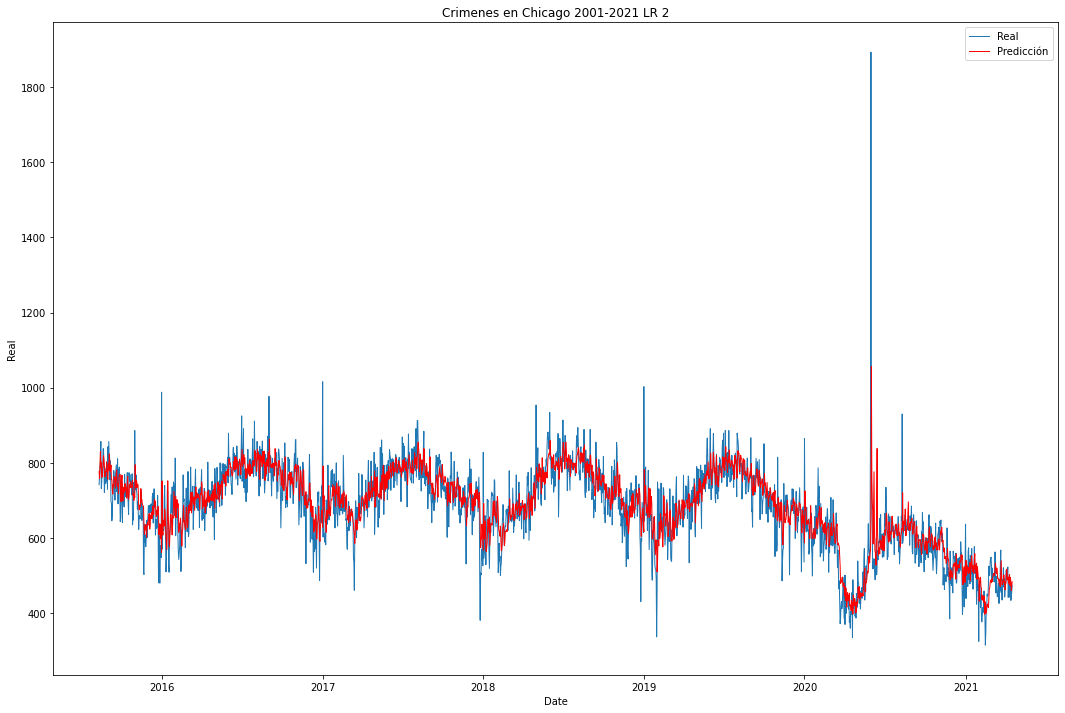

In [40]:
fig = plt.figure(figsize=(18,12))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):], y=df_comparation["Real"][int(X.shape[0]*0.7):], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"][int(X.shape[0]*0.7):],y=df_comparation["Prediccion"][int(X.shape[0]*0.7):], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021 LR 2")

In [41]:
get_metrics(df_comparation["Real"], df_comparation["Prediccion"])

MSE = 6466.540055840468
r^2 = 0.9109450713443618


Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

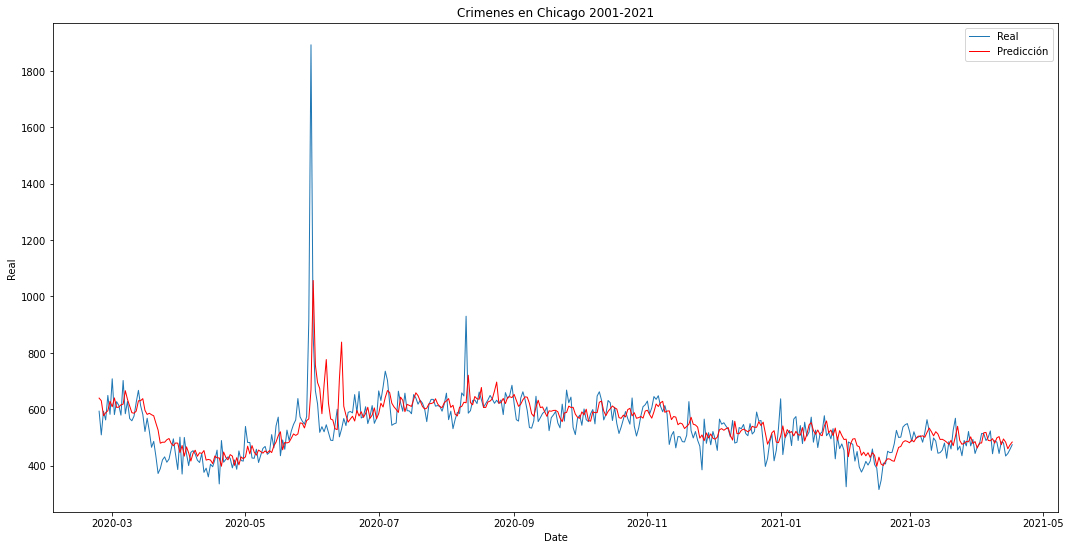

In [42]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"][6500:], y=df_comparation["Real"][6500:], linewidth = 1, label = "Real" , ax = ax)
sns.lineplot(x=df_comparation["Date"][6500:],y=df_comparation["Prediccion"][6500:], linewidth = 1, label = "Predicción" , ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

In [43]:
df_comparation.head(20)

,Date,Real,Prediccion
14,2002-05-09,1366,1309.688386
15,2002-05-10,1492,1336.666506
16,2002-05-11,1235,1344.308344
17,2002-05-12,1153,1251.683149
18,2002-05-13,1383,1267.898207
19,2002-05-14,1429,1340.635218
20,2002-05-15,1507,1379.033709
21,2002-05-16,1244,1381.110069
22,2002-05-17,1396,1325.598943
23,2002-05-18,1352,1321.861810


In [44]:
index = int(X.shape[0]*0.7)
X_f = X[index:index+1]
X_f

array([[748, 752, 760, 959, 806, 722, 745, 753, 793, 815, 837, 737, 797,
        778]])

In [45]:
Y_f = []

In [46]:
for i in range (len(X_test)):
  pred = lin_model.predict(X_f[-1].reshape(1,-1))[0]
  Y_f.append(pred)
  x_tmp = list(X_f[-1][1:])
  x_tmp.append(pred)
  X_f = np.append(X_f,[x_tmp], axis=0)
  #X_f.append(x_tmp)

In [47]:
df_comparation = pd.DataFrame({"Date" : df_comparation["Date"][index:],
                              "Real" : df_comparation["Real"][index:],
                              "Prediccion" : Y_f})

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

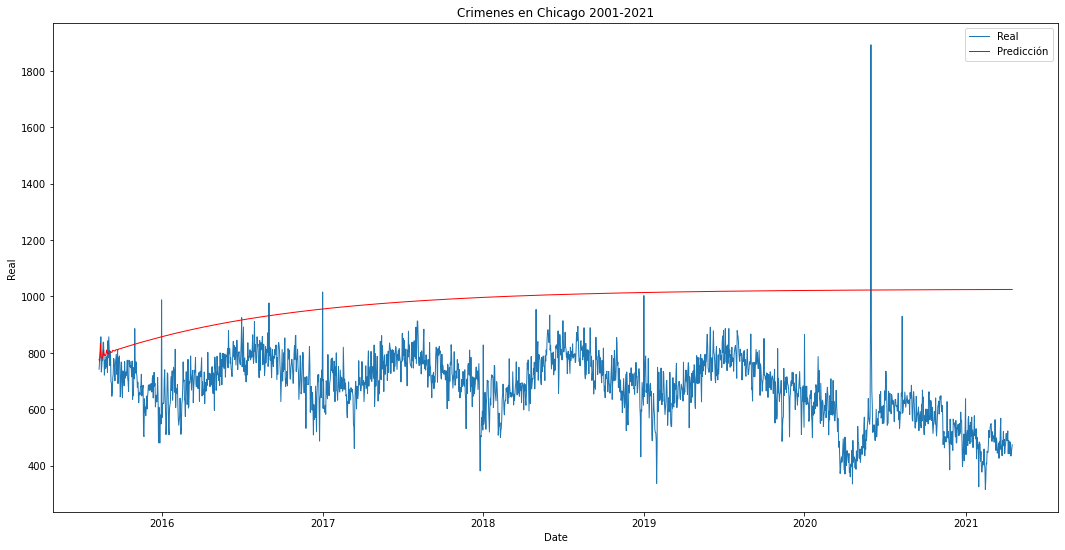

In [48]:
fig = plt.figure(figsize=(18,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], linewidth = 1, label = "Real" ,ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], linewidth = 1, label = "Predicción", ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")

## Modelo LSTM

In [73]:
# Librerias para el modelo LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model

import time
from sklearn.preprocessing import MinMaxScaler

### Instancia 1:
**Parámetros**
* Elementos por muestra : 30
* Capas ocultas: 3 (50,50,50)
* Optimizador : adam
* loss = mean squared error

In [74]:
ts_crime.head()

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447


In [90]:
# Scale features
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(ts_crime[["Total_Crimes"]])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(0,1))
Ys = s2.fit_transform(ts_crime[["Total_Crimes"]])

In [91]:
# Each time step uses last 'window' to predict the next change
window = 30
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

In [92]:
X.shape

(6904, 30, 1)

In [93]:
train = ts_crime[:int(X.shape[0]*0.7)]
test = ts_crime[int(X.shape[0]*0.7):]

In [94]:
train.shape

(4832, 2)

In [95]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [96]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4832, 30, 1)
(2072, 30, 1)
(4832, 1)
(2072, 1)


In [97]:
(X.shape[1],X.shape[2])

(30, 1)

In [98]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, \
          input_shape=((X.shape[1],X.shape[2])))) #(30,1)
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

In [99]:
# Allow for early exit
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
20/20 [==============================] - 8s 138ms/step - loss: 0.1349 - accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 3s 139ms/step - loss: 0.0099 - accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 3s 142ms/step - loss: 0.0079 - accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 3s 138ms/step - loss: 0.0066 - accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 3s 137ms/step - loss: 0.0063 - accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 3s 137ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 3s 138ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 8/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0052 - accuracy: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 3s 140ms/step - loss: 0.0053 - accuracy: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 3s 139ms/st

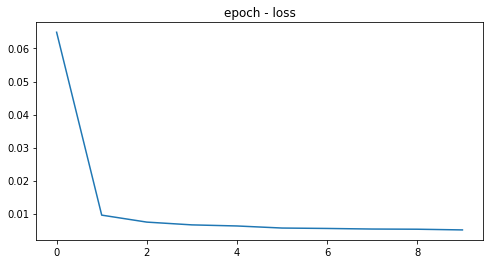

In [100]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sns.lineplot(data = history.history['loss'], ax = ax)
ax.set_title("epoch - loss");

In [101]:
# Verify the fit of the model
Yp = model.predict(X_train)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_train)

In [102]:
print(Yu.shape)
print(Ym.shape)

(4832, 1)
(4832, 1)


In [104]:
train["Date"].shape

(4832,)

In [106]:
Ym = Ym[:,0]
Yu = Yu[:,0]

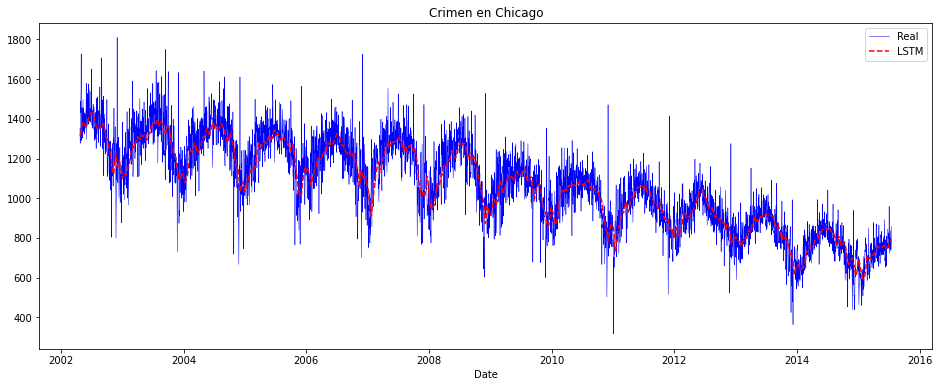

In [107]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = train["Date"], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
sns.lineplot(x = train["Date"], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
ax.set_title("Crimen en Chicago");

In [108]:
get_metrics(Ym, Yu)

MSE = 9497.103239618526
r^2 = 0.8179265946986551


In [178]:
# Verify the fit of the model
Yp = model.predict(X_test)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_test)

In [179]:
Yu.shape

(2072, 1)

In [117]:
get_metrics(Ym, Yu)

MSE = 5175.469582950777
r^2 = 0.6033492766061865


In [110]:
Ym = Ym[:,0]
Yu = Yu[:,0]

In [111]:
print(Yu.shape)
print(Ym.shape)

(2072,)
(2072,)


In [113]:
test["Date"][window:].shape

(2072,)

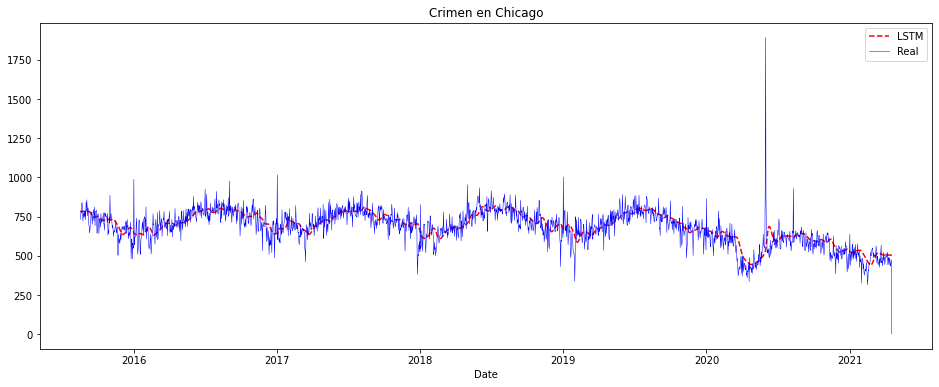

In [114]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [119]:
X_test.shape

(2072, 30, 1)

In [123]:
X_test[0].shape

(30, 1)

In [144]:
X_f = X_test[-1:]
X_f.shape

(1, 30, 1)

In [128]:
X_f[-1].shape

(30, 1)

In [145]:
pred = model.predict(X_f[-1:])[0]
pred

array([0.26430768], dtype=float32)

In [165]:
x_tmp = X_f[-1][1:]
x_tmp = np.append(x_tmp, pred).reshape(-1,1)
X_f = np.append(X_f,[x_tmp], axis=0)

In [166]:
X_f.shape

(2, 30, 1)

In [180]:
X_f = X_test[-1:]
Y_f = []
for _ in range(len(X_test)):
  pred = model.predict(X_f[-1:])[0]
  Y_f.append(pred[0])
  x_tmp = X_f[-1][1:]
  x_tmp = np.append(x_tmp, pred).reshape(-1,1)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [182]:
Yu = s2.inverse_transform(np.array(Y_f).reshape(-1,1))

In [183]:
Yu.shape

(2072, 1)

In [185]:
Yu = Yu[:,0]

In [188]:
Ym = Ym[:,0]

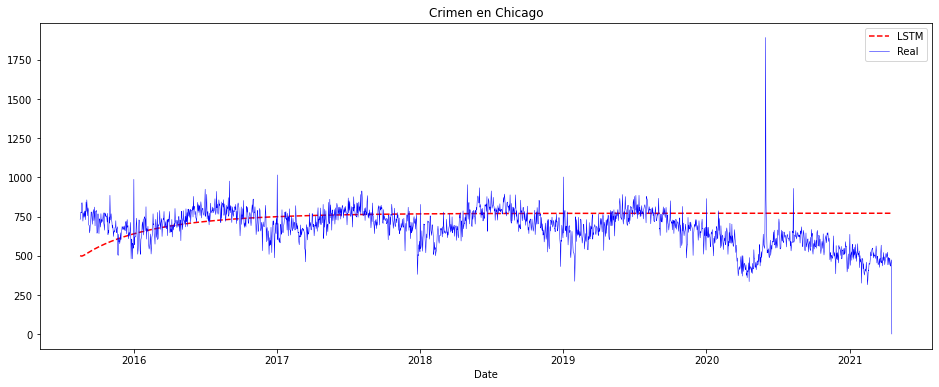

In [189]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

### Instancia 2:
**Parámetros**
* Elementos por muestra : 60
* Capas ocultas: 3 (50,50,50)
* Optimizador : adam
* loss = mean squared error

In [190]:
ts_crime.head()

,Date,Total_Crimes
0,2002-04-25,1294
1,2002-04-26,1367
2,2002-04-27,1254
3,2002-04-28,1119
4,2002-04-29,1447


In [191]:
# Scale features
s1 = MinMaxScaler(feature_range=(0,1))
Xs = s1.fit_transform(ts_crime[["Total_Crimes"]])

# Scale predicted value
s2 = MinMaxScaler(feature_range=(0,1))
Ys = s2.fit_transform(ts_crime[["Total_Crimes"]])

In [192]:
# Each time step uses last 'window' to predict the next change
window = 60
X = []
Y = []
for i in range(window,len(Xs)):
    X.append(Xs[i-window:i,:])
    Y.append(Ys[i])

# Reshape data to format accepted by LSTM
X, Y = np.array(X), np.array(Y)

In [193]:
X.shape

(6874, 60, 1)

In [194]:
train = ts_crime[:int(X.shape[0]*0.7)]
test = ts_crime[int(X.shape[0]*0.7):]

In [195]:
train.shape

(4811, 2)

In [196]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [197]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4811, 60, 1)
(2063, 60, 1)
(4811, 1)
(2063, 1)


In [198]:
(X.shape[1],X.shape[2])

(60, 1)

In [199]:
# create and train LSTM model

# Initialize LSTM model
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, \
          input_shape=((X.shape[1],X.shape[2])))) #(60,1)
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',\
              metrics = ['accuracy'])

In [200]:
# Allow for early exit
es = EarlyStopping(monitor='loss',mode='min',verbose=1,patience=10)

# Fit (and time) LSTM model
t0 = time.time()
history = model.fit(X_train, Y_train, epochs = 10, batch_size = 250, callbacks=[es], verbose=1)
t1 = time.time()
print('Runtime: %.2f s' %(t1-t0))

Epoch 1/10
20/20 [==============================] - 11s 263ms/step - loss: 0.1093 - accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 5s 262ms/step - loss: 0.0104 - accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 5s 265ms/step - loss: 0.0081 - accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 5s 267ms/step - loss: 0.0068 - accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 5s 261ms/step - loss: 0.0060 - accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 5s 262ms/step - loss: 0.0055 - accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0051 - accuracy: 0.0000e+00
Epoch 8/10
20/20 [==============================] - 5s 265ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 9/10
20/20 [==============================] - 5s 268ms/step - loss: 0.0050 - accuracy: 0.0000e+00
Epoch 10/10
20/20 [==============================] - 5s 267ms/s

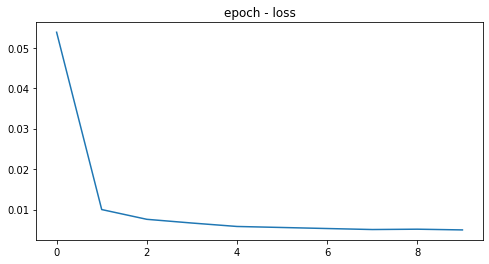

In [201]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot()
sns.lineplot(data = history.history['loss'], ax = ax)
ax.set_title("epoch - loss");

In [202]:
# Verify the fit of the model
Yp = model.predict(X_train)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_train)

In [203]:
print(Yu.shape)
print(Ym.shape)

(4811, 1)
(4811, 1)


In [204]:
train["Date"].shape

(4811,)

In [205]:
Ym = Ym[:,0]
Yu = Yu[:,0]

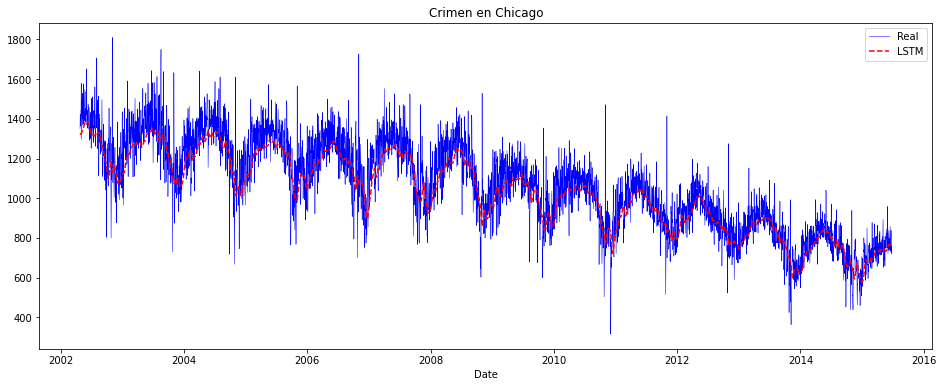

In [206]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = train["Date"], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
sns.lineplot(x = train["Date"], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
ax.set_title("Crimen en Chicago");

In [207]:
get_metrics(Ym, Yu)

MSE = 10820.491912006768
r^2 = 0.7912391302041432


In [208]:
# Verify the fit of the model
Yp = model.predict(X_test)

# un-scale outputs
Yu = s2.inverse_transform(Yp)
Ym = s2.inverse_transform(Y_test)

In [209]:
Yu.shape

(2063, 1)

In [210]:
get_metrics(Ym, Yu)

MSE = 5205.781953231904
r^2 = 0.6012965337793944


In [211]:
Ym = Ym[:,0]
Yu = Yu[:,0]

In [212]:
print(Yu.shape)
print(Ym.shape)

(2063,)
(2063,)


In [213]:
test["Date"][window:].shape

(2063,)

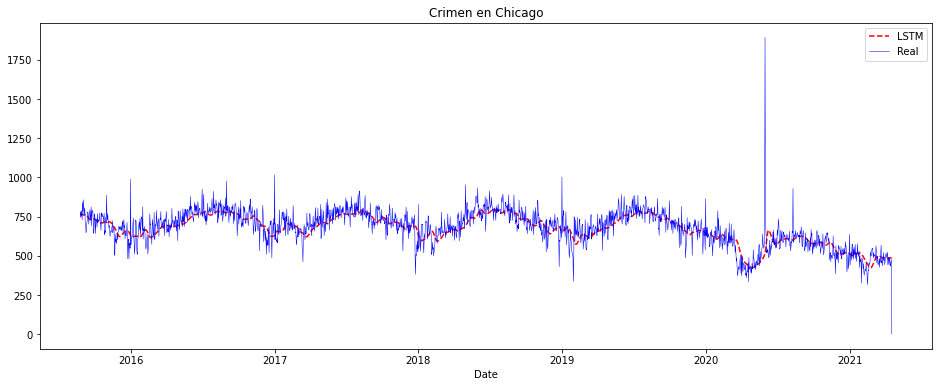

In [214]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

In [215]:
X_test.shape

(2063, 60, 1)

In [216]:
X_test[0].shape

(60, 1)

In [217]:
X_f = X_test[-1:]
X_f.shape

(1, 60, 1)

In [218]:
X_f[-1].shape

(60, 1)

In [219]:
pred = model.predict(X_f[-1:])[0]
pred

array([0.25469422], dtype=float32)

In [220]:
x_tmp = X_f[-1][1:]
x_tmp = np.append(x_tmp, pred).reshape(-1,1)
X_f = np.append(X_f,[x_tmp], axis=0)

In [221]:
X_f.shape

(2, 60, 1)

In [222]:
X_f = X_test[-1:]
Y_f = []
for _ in range(len(X_test)):
  pred = model.predict(X_f[-1:])[0]
  Y_f.append(pred[0])
  x_tmp = X_f[-1][1:]
  x_tmp = np.append(x_tmp, pred).reshape(-1,1)
  X_f = np.append(X_f,[x_tmp], axis=0)

In [223]:
Yu = s2.inverse_transform(np.array(Y_f).reshape(-1,1))

In [229]:
Yu.shape

(2063,)

In [ ]:
Yu = Yu[:,0]
Yu.shape

In [227]:
Ym.shape

(2063,)

In [226]:
Ym = Ym[:,0]

IndexError: ignored

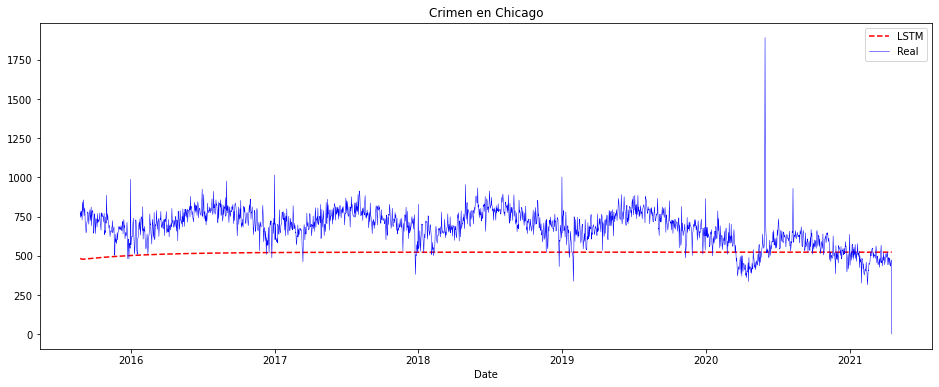

In [230]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot()
sns.lineplot(x = test["Date"][window:], y = Yu, color = "red" , ls = "--", label = "LSTM",  ax = ax)
sns.lineplot(x = test["Date"][window:], y = Ym, color = "blue", label = "Real",linewidth = .5 ,  ax = ax)
ax.set_title("Crimen en Chicago");

## Regresión con Red Neuronal

In [49]:
from sklearn.neural_network import MLPRegressor

### Instancia 1:
**Parámetros**
* Elementos por muestra : 30
* Capas ocultas: 5 (25, 20, 15, 10, 5)
* solver: sgd
* activation: relu

In [50]:
window = 30
X, Y = transformarSerieADataset(ts_crime["Total_Crimes"].to_numpy(), elementosPorMuestra = window)

In [51]:
print(X.shape)
print(Y.shape)

(6903, 30)
(6903,)


In [52]:
start = window
end = ts_crime.shape[0] - 2
(start, end)

(30, 6932)

In [53]:
X

array([[1294, 1367, 1254, ..., 1302, 1521, 1433],
       [1367, 1254, 1119, ..., 1521, 1433, 1353],
       [1254, 1119, 1447, ..., 1433, 1353, 1278],
       ...,
       [ 455,  480,  426, ...,  484,  481,  434],
       [ 480,  426,  485, ...,  481,  434,  443],
       [ 426,  485,  459, ...,  434,  443,  458]])

In [54]:
Y

array([1353, 1278, 1277, ...,  443,  458,  474])

In [59]:
ts_crime[window:end+1]

,Date,Total_Crimes
30,2002-05-25,1353
31,2002-05-26,1278
32,2002-05-27,1277
33,2002-05-28,1488
34,2002-05-29,1432
...,...,...
6928,2021-04-13,481
6929,2021-04-14,434
6930,2021-04-15,443
6931,2021-04-16,458


In [60]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
Y_train = Y[:int(X.shape[0]*0.7)]
Y_test = Y[int(X.shape[0]*0.7):]

In [61]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(4832, 30)
(2071, 30)
(4832,)
(2071,)


In [70]:
model = MLPRegressor(hidden_layer_sizes = (25, 20, 15, 10, 5), solver = "sgd", activation = "identity")
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_base.py:195: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='identity', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(25, 20, 15, 10, 5), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [71]:
Y_predicted = model.predict(X)
df_comparation = pd.DataFrame({"Date":ts_crime["Date"][window:-1],
                               "Real":Y,
                               "Prediccion":Y_predicted})
df_comparation.shape

(6903, 3)

In [72]:
Y_predicted

array([nan, nan, nan, ..., nan, nan, nan])

In [67]:
Y

array([1353, 1278, 1277, ...,  443,  458,  474])

Text(0.5, 1.0, 'Crimenes en Chicago 2001-2021')

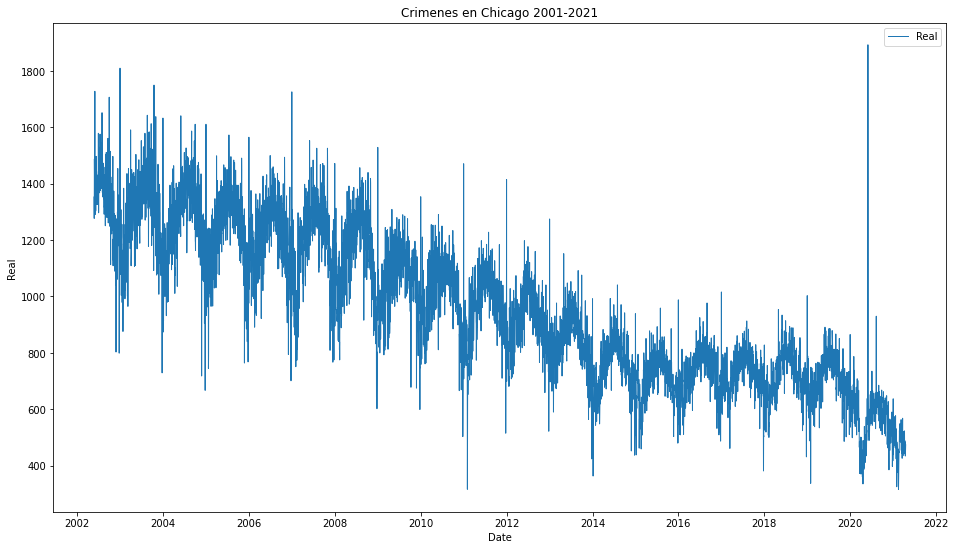

In [69]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot()
sns.lineplot(x=df_comparation["Date"], y=df_comparation["Real"], label = "Real" , linewidth = 1, ax = ax)
sns.lineplot(x=df_comparation["Date"],y=df_comparation["Prediccion"], label = "Predicción" , linewidth = 1, ax = ax, color = "red")
ax.set_title("Crimenes en Chicago 2001-2021")